In [2]:
from Util import ModelEvaluator
import numpy as np
import pandas as pd

In [15]:
# 加载第一个 .npy 文件
file1_path = 'data/dt1/mode1/predictions.npy'
file2_path = 'data/dt1/mode1/targets.npy'

# 提取数据
data1 = np.load(file1_path)
data2 = np.load(file2_path)

# 打印前10个数据
print("File 1 - First 10 entries:")
print(data1[:10],data1.shape)

print("\nFile 2 - First 10 entries:")
print(data2[:10],data2.shape)


File 1 - First 10 entries:
[[-1.4360623]
 [-1.4270154]
 [-1.4222628]
 [-1.41607  ]
 [-1.4066216]
 [-1.4005499]
 [-1.3940504]
 [-1.3816712]
 [-1.3717002]
 [-1.3639987]] (600, 1)

File 2 - First 10 entries:
[-1.3979442 -1.3872551 -1.3778762 -1.3683074 -1.35835   -1.3471997
 -1.3349146 -1.3225563 -1.3108201 -1.2993556] (600,)


In [4]:
import os

file_path = 'E:/Dataset/waves/'
def standardize(data):
    """
    对一列数据进行标准化，返回标准化后的数据、均值和标准差。

    参数：
    data: np.ndarray - 输入数据，形状为 (样本数, ) 或 (样本数, 1)。

    返回：
    standardized_data: np.ndarray - 标准化后的数据。
    mean: float - 数据的均值。
    std: float - 数据的标准差。
    """
    # 计算数据的均值和标准差
    mean = np.mean(data)
    std = np.std(data)

    # 对数据进行标准化
    standardized_data = (data - mean) / std

    return standardized_data, mean, std

def standardize_data():
    file_prefix = 'mode'
    file_suffix = '.csv'
    num_modes = 8
    mean_list=[]
    std_list=[]
    for i in range(1, num_modes + 1):
        # 读取数据
        file_path_mode = file_path + f'{file_prefix}{i}{file_suffix}'
        data = pd.read_csv(file_path_mode)
        req_data=data['MWH']
        # 标准化
        standardized_data, mean, std = standardize(req_data)
        # 保存均值和标准差
        mean_list.append(mean),std_list.append(std)
    # 定义保存路径
    save_dir = './data/'  # 保存到 data 目录
    # 将 mean_list 和 std_list 转换为 numpy 数组
    mean_array = np.array(mean_list)
    std_array = np.array(std_list)

    # 保存为 .npy 文件
    np.save(save_dir+'mean.npy', mean_array)
    np.save(save_dir+'std.npy', std_array)
    print("mean 和 std 已保存为 .npy 文件")
standardize_data()


mean 和 std 已保存为 .npy 文件


In [24]:
def inverse_standardize(standardized_data, means, stds):
    """
    反标准化数据。

    参数：
    standardized_data: np.ndarray - 标准化后的数据。
    means: np.ndarray - 每个通道的均值。
    stds: np.ndarray - 每个通道的标准差。

    返回：
    original_data: np.ndarray - 反标准化后的原始数据。
    """
    original_data = (standardized_data * stds) + means
    return original_data

In [8]:
import numpy as np

# 假设你已经加载了 mean 和 std 的 numpy 数组
mean_loaded = np.load('data/dt1/mean.npy')
std_loaded = np.load('data/dt1/std.npy')

# 查看 mean 的形状和内容
print("Mean 的形状：", mean_loaded.shape)
print("Mean 的内容：", mean_loaded)

# 查看 std 的形状和内容
print("Std 的形状：", std_loaded.shape)
print("Std 的内容：", std_loaded)


Mean 的形状： (8,)
Mean 的内容： [ 1.93264390e+00  6.06148333e-10 -1.27216668e-11  1.04545671e-11
  2.11569000e-10  2.07177666e-11 -8.65469999e-11  2.28215234e-11]
Std 的形状： (8,)
Std 的内容： [0.73106665 0.14573481 0.06303799 0.05144888 0.05055763 0.05002146
 0.04983501 0.04857354]


In [18]:
# 定义文件路径
data_dir = './data/'
mean_path = os.path.join(data_dir, 'mean.npy')
std_path = os.path.join(data_dir, 'std.npy')
predication_mode_path = os.path.join(data_dir, 'predictions.npy')  # 假设 premode 文件是 premode.npy
save_path = os.path.join(data_dir, 'pre_mode_inverse.npy')

# 加载均值、标准差和 premode 数据
mean = np.load(mean_path)
std = np.load(std_path)
premode = np.load(predication_mode_path)

# 反标准化
premode_inverse = inverse_standardize(premode, mean[0], std[0])
# 保存反标准化后的数据
np.save(save_path, premode_inverse)
print(f"反标准化后的数据已保存为 {save_path}")

反标准化后的数据已保存为 ./data/pre_mode_inverse.npy


(600, 1) (600,)


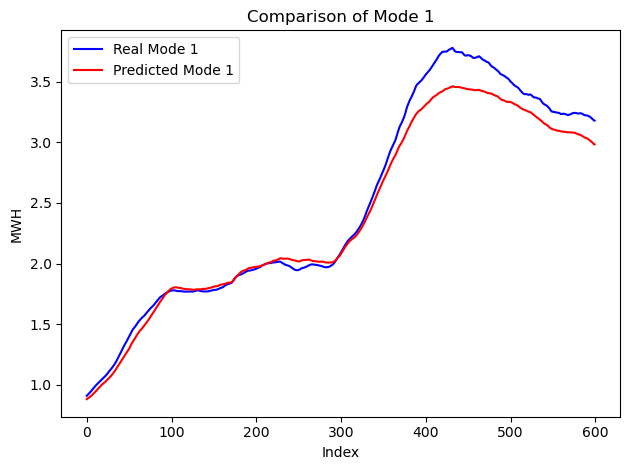

In [20]:
def compare_mode():
    file_path ='E:/Dataset/waves/mode1.csv' # 构造文件路径
    data = pd.read_csv(file_path)
    mwh_data = data['MWH'].values[-600:]  # 提取最后 600 行的 MWH 列
    # 2. 加载预测值 (来自 pre-mode.npy)
    predicted_modes = np.load('data/dt1/mode1/pre_mode_inverse.npy')  # 预测值应该是 shape (600, 8)
    print(predicted_modes.shape,mwh_data.shape)
    # 绘制单个模态的真实值和预测值
    plt.plot(mwh_data, label="Real Mode 1", color='blue')  # 真实值
    plt.plot(predicted_modes, label="Predicted Mode 1", color='red')  # 预测值
    
    plt.xlabel("Index")
    plt.ylabel("MWH")
    plt.title("Comparison of Mode 1")
    plt.legend()
    
    plt.tight_layout()  # 调整布局
    plt.show()  # 显
compare_mode()

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compare_modes():
    # 1. 加载真实值 (真实的 MWH 数据，来自 mode1-mode8.csv 文件)
    real_modes = []
    for i in range(1, 9):  # 从 mode1.csv 到 mode8.csv
        file_path ='E:/Dataset/waves/'+ f'mode{i}.csv'  # 构造文件路径
        data = pd.read_csv(file_path)
        mwh_data = data['MWH'].values[-600:]  # 提取最后 600 行的 MWH 列
        real_modes.append(mwh_data)

    real_modes = np.array(real_modes)  # 将所有模式的数据合并成一个 NumPy 数组 (8, 600)

    # 2. 加载预测值 (来自 pre-mode.npy)
    predicted_modes = np.load('data/dt1/predictions_inverse.npy')  # 预测值应该是 shape (600, 8)

    # 3. 画折线图
    plt.figure(figsize=(14, 10))

    for i in range(8):  # 绘制 8 个模态
        plt.subplot(4, 2, i + 1)  # 4 行 2 列的子图，每个模态对应一个子图
        plt.plot(real_modes[i], label=f"Real Mode {i + 1}", color='blue')  # 真实值
        plt.plot(predicted_modes[:, i], label=f"Predicted Mode {i + 1}", color='red')  # 预测值
        plt.xlabel("Index")
        plt.ylabel("MWH")
        plt.title(f"Comparison of Mode {i + 1}")
        plt.legend()

    plt.tight_layout()  # 调整布局
    plt.show()  # 显示图像

In [23]:
predication = np.load('data/dt1/mode1/pre_mode_inverse.npy')
data = pd.read_csv('E:/Dataset/waves/mode1.csv')
mwh_data = data['MWH'].values[-600:]  # 提取最后 600 行的 MWH 列
mwh_data=mwh_data.reshape(-1, 1) 
print(predication.shape, mwh_data.shape)
print(predication[:10], mwh_data[:10])
evaluator = ModelEvaluator(predication, mwh_data)
print(f"Root Mean Squared Error (RMSE): {evaluator.rmse()}")
print(f"Mean Absolute Error (MAE): {evaluator.mae()}")
print(f"Sum of Squared Errors (SSE): {evaluator.sse()}")
print(f"Mean Absolute Percentage Error (MAPE): {evaluator.mape()}")
print(f"Theil's Inequality Coefficient (TIC): {evaluator.tic()}")


(600, 1) (600, 1)
[[0.88278663]
 [0.8894005 ]
 [0.89287496]
 [0.8974024 ]
 [0.90430975]
 [0.9087486 ]
 [0.9135002 ]
 [0.9225502 ]
 [0.9298396 ]
 [0.93547   ]] [[0.9106535 ]
 [0.91846794]
 [0.92532456]
 [0.93232006]
 [0.93959945]
 [0.9477511 ]
 [0.9567324 ]
 [0.96576715]
 [0.974347  ]
 [0.98272836]]
Root Mean Squared Error (RMSE): 0.14172877326063868
Mean Absolute Error (MAE): 0.10691809326805062
Sum of Squared Errors (SSE): 12.052227101979318
Mean Absolute Percentage Error (MAPE): 3.974776963846966
Theil's Inequality Coefficient (TIC): 0.056212476291945396


In [25]:
import os
import numpy as np

# 定义文件路径
data_dir = './data/dt1/'
mode_dirs = [f'mode{i}' for i in range(1, 9)]  # mode1 到 mode8 的文件夹
mean_path = os.path.join(data_dir, 'mean.npy')
std_path = os.path.join(data_dir, 'std.npy')
save_path = os.path.join(data_dir, 'predictions_inverse.npy')

# 加载均值和标准差
mean = np.load(mean_path)
std = np.load(std_path)

# 初始化用于拼接的列表
predictions_list = []

# 从各个 mode 文件夹中提取 predictions.npy 并拼接
for i, mode_dir in enumerate(mode_dirs):
    prediction_path = os.path.join(data_dir, mode_dir, 'predictions.npy')
    pred = np.load(prediction_path)  # 加载预测值
    predictions_list.append(pred)  # 添加到列表

# 将列表中的预测值拼接成 (600, 8) 的数组
predictions_combined = np.hstack(predictions_list)

# 对每个通道（mode）进行反标准化
# mean[i] 和 std[i] 分别为每个 mode 的均值和标准差
for i in range(predictions_combined.shape[1]):
    predictions_combined[:, i] = inverse_standardize(predictions_combined[:, i], mean[i], std[i])

# 保存反标准化后的数据
np.save(save_path, predictions_combined)
print(f"反标准化后的数据已保存为 {save_path}")


反标准化后的数据已保存为 ./data/dt1/predictions_inverse.npy


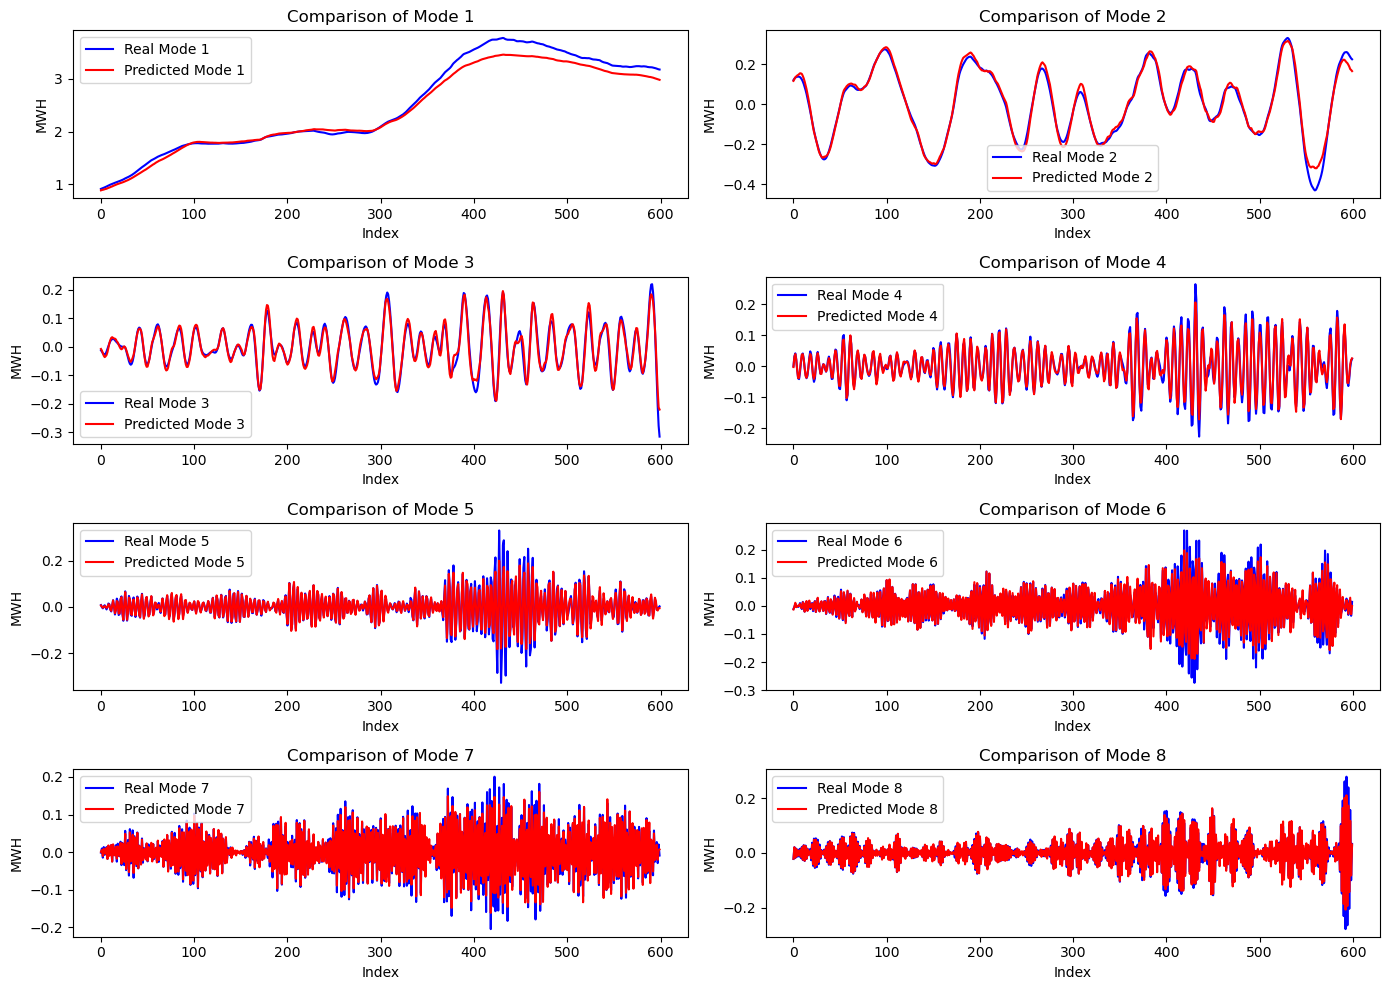

In [28]:
compare_modes()

In [11]:
# 1. 加载真实值 (真实的 MWH 数据，来自 mode1-mode8.csv 文件)
real_modes = []
for i in range(1, 9):  # 从 mode1.csv 到 mode8.csv
    file_path ='E:/Dataset/waves/'+ f'mode{i}.csv'  # 构造文件路径
    data = pd.read_csv(file_path)
    mwh_data = data['MWH'].values[-600:]  # 提取最后 600 行的 MWH 列
    real_modes.append(mwh_data)
real_modes = np.array(real_modes)# 将所有模式的数据合并成一个 NumPy 数组 (8, 600)
real_modes =real_modes.transpose(1,0)
print(real_modes.shape)


(600, 8)


In [12]:
# 2. 加载预测值 (来自 pre-mode.npy)
predicted_modes = np.load('data/dt1/predictions_inverse.npy')  # 预测值应该是 shape (600, 8)
print(predicted_modes.shape)

(600, 8)


In [35]:
def extract_label():
    file_path = 'E:/Dataset/waves/'
    file_path_ori = file_path + 'dataset1.csv'
    data = pd.read_csv(file_path_ori)
    # 忽略 'Date/Time' 列
    if 'Date/Time' in data.columns:
        data = data.drop(columns=['Date/Time'])
    mwh_data = data['MWH'].values[-600:]  # 提取最后 600 行的 MWH 列
    mwh_data=mwh_data.reshape(-1, 1) 
    return mwh_data

In [36]:
original_data = extract_label()
original_data.shape

(600, 1)

In [39]:
# 2. 加载源数据预测值 (相加之后的)
predicted_original_data = np.load('data/dt1/pre_original_data.npy')  # 预测值应该是 shape (600, 8)
print(predicted_original_data.shape)

(600, 1)


In [40]:
#源数据的数据评测
print(predicted_original_data[:10], original_data[:10])
evaluator = ModelEvaluator(predicted_original_data, original_data)
print(f"Root Mean Squared Error (RMSE): {evaluator.rmse()}")
print(f"Mean Absolute Error (MAE): {evaluator.mae()}")
print(f"Sum of Squared Errors (SSE): {evaluator.sse()}")
print(f"Mean Absolute Percentage Error (MAPE): {evaluator.mape()}")
print(f"Theil's Inequality Coefficient (TIC): {evaluator.tic()}")

[[0.96140265]
 [1.0538923 ]
 [1.0238779 ]
 [1.0431786 ]
 [0.9860541 ]
 [0.98924583]
 [0.9943314 ]
 [1.0451715 ]
 [1.1078894 ]
 [1.1459994 ]] [[0.97]
 [1.16]
 [1.02]
 [1.09]
 [0.97]
 [0.98]
 [1.02]
 [1.11]
 [1.13]
 [1.19]]
Root Mean Squared Error (RMSE): 0.1945817692513886
Mean Absolute Error (MAE): 0.13147348121007285
Sum of Squared Errors (SSE): 22.71723895500038
Mean Absolute Percentage Error (MAPE): 5.0262900478316475
Theil's Inequality Coefficient (TIC): 0.07641751091845467


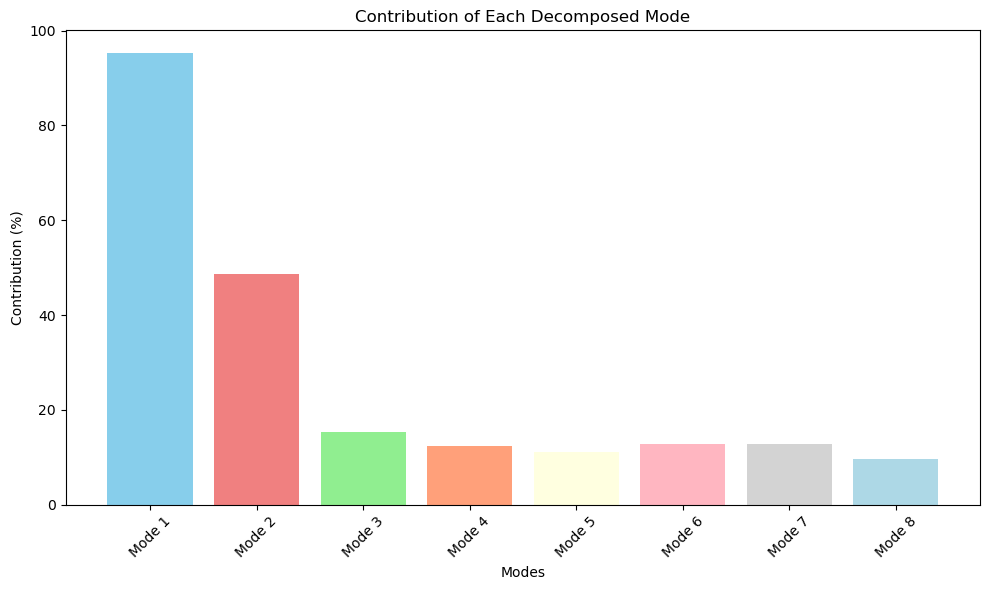

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_mape(actual, predicted):
    """计算平均绝对百分比误差 (MAPE)"""
    return (np.abs((actual - predicted) / actual).mean()) * 100

def calculate_contribution(original_data, predicted_modes):
    """
    计算每个模式的贡献度，并绘制贡献度图。

    参数:
        original_data (numpy.ndarray): 真实值数组，形状为 (600, 1)。
        predicted_modes (numpy.ndarray): 预测值数组，形状为 (600, 8)。
    """
    # 将真实值数组展平
    actual = original_data.flatten()

    # 计算最终预测值：所有模式的预测值相加
    final_prediction = np.sum(predicted_modes, axis=1)  # 沿第二维求和

    # 计算总 MAPE
    mape_total = calculate_mape(actual, final_prediction)

    # 计算每个模式的 MAPE 值（去掉当前模态）
    mape_values = []
    for i in range(predicted_modes.shape[1]):
        # 其他模式的预测值相加
        predicted_others = np.sum(np.delete(predicted_modes, i, axis=1), axis=1)
        
        # 计算 MAPE
        mape_value = calculate_mape(actual, predicted_others)
        mape_values.append(mape_value)

    # 计算贡献度
    
    contri_values = [np.abs((mape_total - mape_i) / mape_i) * 100 for mape_i in mape_values]

 # 定义颜色列表
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightyellow', 'lightpink', 'lightgray', 'lightblue']

    # 绘制条形图
    modes = [f"Mode {i+1}" for i in range(len(mape_values))]
    plt.figure(figsize=(10, 6))
    plt.bar(modes, contri_values, color=colors[:len(modes)])  # 使用前n种颜色
    plt.xlabel("Modes")
    plt.ylabel("Contribution (%)")
    plt.title("Contribution of Each Decomposed Mode")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 使用示例
# 假设 original_data 和 predicted_modes 已经定义
calculate_contribution(original_data, predicted_modes)  # 计算并绘制贡献度图


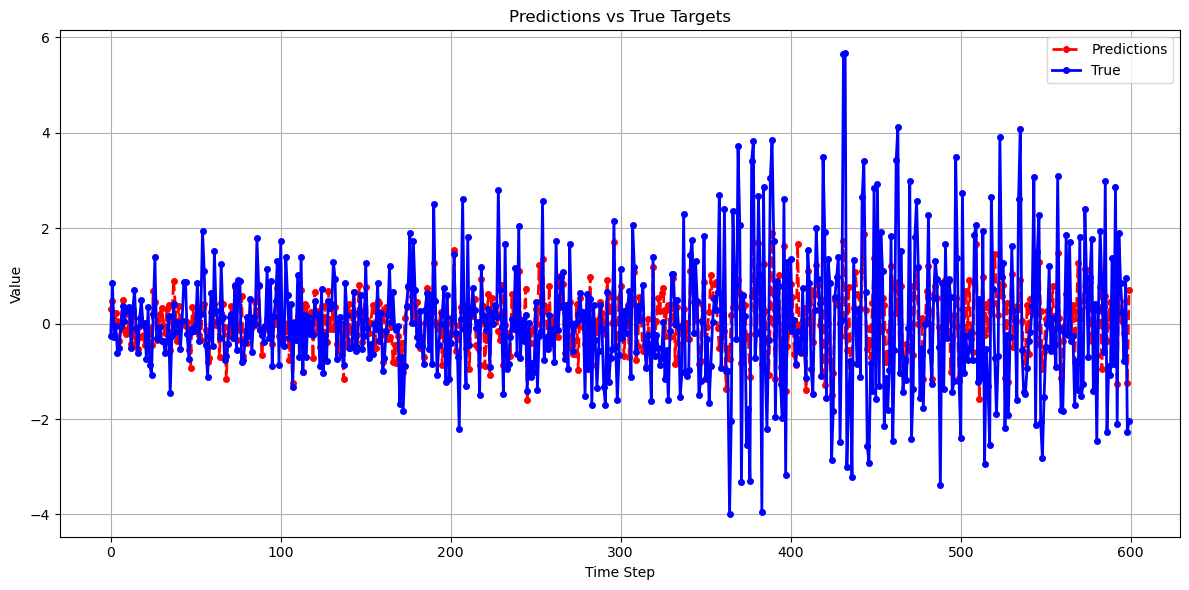

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os

def load_res_data(base_path):
    """
    从指定路径加载 predictions.npy 和 targets.npy 文件。

    参数：
    base_path: str - 包含 'predictions.npy' 和 'targets.npy' 的文件夹路径。

    返回：
    predictions: numpy.ndarray - 预测值数组。
    targets: numpy.ndarray - 目标值数组。
    """
    predictions_path = os.path.join(base_path, 'predictions.npy')
    targets_path = os.path.join(base_path, 'targets.npy')

    # 加载数据
    predictions = np.load(predictions_path)
    targets = np.load(targets_path)

    return predictions, targets

def plot_predictions_and_targets(predictions, targets):
    """
    绘制预测值和目标值的折线图。

    参数：
    predictions: numpy.ndarray - 预测值数组。
    targets: numpy.ndarray - 目标值数组。
    """
    plt.figure(figsize=(12, 6))

    # 绘制预测值
    plt.plot(predictions, label='Predictions', color='red', linestyle='--', linewidth=2, marker='o', markersize=4)

    # 绘制目标值
    plt.plot(targets, label='True', color='blue', linestyle='-', linewidth=2, marker='o', markersize=4)

    # 图形美化
    plt.title('Predictions vs True Targets')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.tight_layout()

    # 显示图形
    plt.show()

# 设置路径
base_path = './Residual/data'  # 修改为你的实际数据路径

# 加载数据
predictions, targets = load_res_data(base_path)

# 绘制折线图
plot_predictions_and_targets(predictions, targets)


In [21]:
def load_data(base_path):
    """
    从指定路径加载 predictions.npy 和 targets.npy 文件。

    参数：
    base_path: str - 包含 'predictions.npy' 和 'targets.npy' 的文件夹路径。

    返回：
    predictions: numpy.ndarray - 预测值数组。
    targets: numpy.ndarray - 目标值数组。
    """
    predictions_path = os.path.join(base_path, 'predictions_inverse.npy')
    # 加载数据
    predictions = np.load(predictions_path)

    return predictions


In [22]:
predictions=load_data('./data/dt1')

In [23]:
predictions.shape

(600, 8)

In [30]:
import numpy as np
import pandas as pd

def standardize(data):
    """
    按通道标准化多通道数据，返回标准化后的数据、均值和标准差。

    参数：
    data: np.ndarray - 输入数据，形状为 (样本数, 通道数)。

    返回：
    standardized_data: np.ndarray - 标准化后的数据。
    means: np.ndarray - 每个通道的均值。
    stds: np.ndarray - 每个通道的标准差。
    """
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)

    standardized_data = (data - means) / stds

    return standardized_data, means, stds

def inverse_standardize(data, means, stds):
    """
    对标准化数据进行反标准化。

    参数：
    data: np.ndarray - 标准化后的数据。
    means: np.ndarray - 每个通道的均值。
    stds: np.ndarray - 每个通道的标准差。

    返回：
    original_data: np.ndarray - 反标准化后的数据。
    """
    original_data = data * stds + means
    return original_data

# 读取残差数据
data = pd.read_csv('E:/Dataset/waves/mode_residual.csv')

# 确保只选择需要的列，假设这些列为 SWH, MWH, ZUWP, PEWP
columns = ['MWH']
data = data[columns].values  # 转换为 NumPy 数组

# 标准化数据
standardized_data, mean, std = standardize(data)

# 读取预测数据
data_pre = np.load('./Residual/data/predictions.npy')

# 反标准化
original_data_pre_res = inverse_standardize(data_pre, mean, std)

# 保存反标准化后的数据
save_path = './Residual/data/predictions_res_inverse.npy'
np.save(save_path, original_data_pre_res)
print(f"反标准化后的数据已保存为 {save_path}")


反标准化后的数据已保存为 ./Residual/data/predictions_res_inverse.npy


In [31]:
import numpy as np

# 加载反标准化后的预测数据
predictions_res_inverse = np.load('./Residual/data/predictions_res_inverse.npy')
predictions_inverse = np.load('./data/dt1/predictions_inverse.npy')

# 确保它们的形状正确
print(f"predictions_res_inverse shape: {predictions_res_inverse.shape}")  # 应该是 (600, 1)
print(f"predictions_inverse shape: {predictions_inverse.shape}")  # 应该是 (600, 8)

# 拼接数据，axis=1 表示按列拼接
combined_predictions = np.concatenate((predictions_res_inverse, predictions_inverse), axis=1)

# 验证拼接后的形状
print(f"Combined shape: {combined_predictions.shape}")  # 应该是 (600, 9)

# 保存拼接后的数据
np.save('./Residual/data/combined_predictions.npy', combined_predictions)
print("拼接后的数据已保存为 './Residual/data/combined_predictions.npy'")


predictions_res_inverse shape: (600, 1)
predictions_inverse shape: (600, 8)
Combined shape: (600, 9)
拼接后的数据已保存为 './Residual/data/combined_predictions.npy'


In [34]:
from Util import AnticipationModule
def anticipate_mode_ori(data_path):
    predication = np.load(data_path)
    anticipation_module = AnticipationModule()
    prediction_data = anticipation_module(predication)
    return prediction_data
anticipate_data = anticipate_mode_ori('./Residual/data/combined_predictions.npy')
print(anticipate_data.shape)
np.save('./Residual/data/pre_original_data.npy', anticipate_data)

(600, 1)


In [38]:
#源数据加残差的数据评测
# 2. 加载源数据预测值 (相加之后的)
predicted_original_data = np.load('./Residual/data/pre_original_data.npy')  # 预测值应该是 shape (600, 9)
print(predicted_original_data.shape)
print(predicted_original_data[:10], original_data[:10])
from Util import ModelEvaluator
evaluator = ModelEvaluator(predicted_original_data, original_data)

print(f"Root Mean Squared Error (RMSE): {evaluator.rmse()}")
print(f"Mean Absolute Error (MAE): {evaluator.mae()}")
print(f"Sum of Squared Errors (SSE): {evaluator.sse()}")
print(f"Mean Absolute Percentage Error (MAPE): {evaluator.mape()}")
print(f"Theil's Inequality Coefficient (TIC): {evaluator.tic()}")

(600, 1)
[[0.98631523]
 [1.09328479]
 [1.00074863]
 [1.06181826]
 [0.99052513]
 [0.95761229]
 [0.99447579]
 [1.0872329 ]
 [1.09695134]
 [1.12662878]] [[0.97]
 [1.16]
 [1.02]
 [1.09]
 [0.97]
 [0.98]
 [1.02]
 [1.11]
 [1.13]
 [1.19]]
Root Mean Squared Error (RMSE): 0.17852631805030456
Mean Absolute Error (MAE): 0.12194681428472487
Sum of Squared Errors (SSE): 19.1229877419591
Mean Absolute Percentage Error (MAPE): 4.650659404290193
Theil's Inequality Coefficient (TIC): 0.06991566556444236


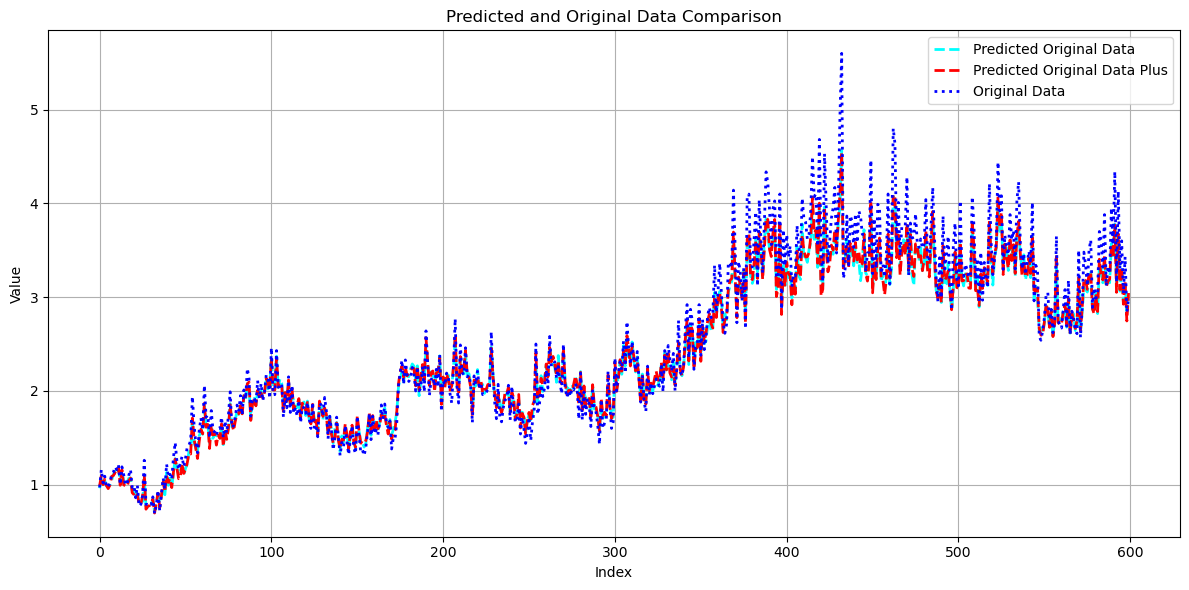

In [43]:
import numpy as np
import matplotlib.pyplot as plt

predicted_original_data = np.load('data/dt1/pre_original_data.npy')
predicted_original_data_plus = np.load('./Residual/data/pre_original_data.npy')

# 绘制折线图
plt.figure(figsize=(12, 6))

# 绘制 predicted_original_data
plt.plot(predicted_original_data, color='cyan', linestyle='--', label='Predicted Original Data', linewidth=2)

# 绘制 predicted_original_data_plus
plt.plot(predicted_original_data_plus, color='red', linestyle='--', label='Predicted Original Data Plus', linewidth=2)

# 绘制 original_data
plt.plot(original_data, color='blue', linestyle=':', label='Original Data', linewidth=2)

# 图表设置
plt.title('Predicted and Original Data Comparison')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()

# 显示图像
plt.tight_layout()
plt.show()
